## <b>Chapter 5.의미 연결망 분석(Semantic Network Analysis)</b>

- 사회 연결망 분석(Social Network Analysis)은 분석 대상 및 분석 대상들간의 관계를 연결망 구조로 표현하고 이를 계량적으로 제시하는 분석 기법이다,
- 사회 연결망 분석은 사람, 장소, 물품 등의 객체 간의 관계를 분석하는데 효과적이며 주로 친구 관계, 전력 공급 등을 분석하는데 사용한다.
- 사회 연결망 분석 기법을 텍스트 내 단어의 관계에 적용한 것이 바로 의미 연결망 분석((Semantic Network Analysis)이다.
- 의미 연결망 분석에서는 일정한 범위 내에서 어휘가 동시에 등장하면 서로 연결된 것으로 간주, 이 연결 관계들을 분석한다.

### 1. n-gram 추출

- n-gram은 n개의 어절이나 음절을 연쇄적으로 분류해 그 빈도를 분석한다.
- 앞 뒤 어휘를 파악하여 관계를 생성하기 위해 n-gram 생성을 한다.

##### ① 데이터 입력

In [2]:
sentence = "I love data science and deep learning"

##### ② bgram

In [3]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\poscouser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from nltk import word_tokenize, bigrams

In [5]:
tokens = word_tokenize(sentence)

bgram = bigrams(tokens)
bgram_list = [x for x in bgram]

print(bgram_list)

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning')]


##### ② trigram, quadgram

In [5]:
from nltk.util import ngrams

In [6]:
tgram = ngrams(tokens, 3)
qgram = ngrams(tokens, 4)

tgram_list = [x for x in tgram]
qgram_list = [x for x in qgram]

print(tgram_list)
print(qgram_list)

[('I', 'love', 'data'), ('love', 'data', 'science'), ('data', 'science', 'and'), ('science', 'and', 'deep'), ('and', 'deep', 'learning')]
[('I', 'love', 'data', 'science'), ('love', 'data', 'science', 'and'), ('data', 'science', 'and', 'deep'), ('science', 'and', 'deep', 'learning')]


### 2. 어휘 동시 출현 빈도의 계수화

* 동시 출현(Co-occurrence)란 두 개 이상의 어휘가 일정한 범위나 거리 내에서 함께 출현하는 것을 의미한다.
* 단어간의 동시 출현 관계를 분석하면 문서나 문장으로부터 두 단어가 유사한 의미를 가졌는지 등의 추상화된 정보를 얻을 수 있다.
* 동시 출현 빈도는 Window라는 지정 범위 내에서 동시 등장한 어휘를 확률 등으로 계수화 가능하다.
* 예를 들어, 단어 뒤 잘못된 단어가 온다면, 이를 동시 출현 빈도가 높은 단어로 교정 가능, 또는 연관/관련 단처 추천 용도로도 사용 가능하다.

* 어휘 동시 출현 빈도 행렬은 하나하나 측정할 수도 있지만, 바이그램 개수를 정리하면 편리하게 만들어 볼 수 있다.
* `nltk`에서 제공하는 `ConditionalFreqDist` 함수를 이용하면 문맥별 단어 빈도를 쉽게 측정 가능하다.

#### 1) 문맥별 단어 빈도 측정

##### ① 데이터 입력

In [7]:
sentences = ["I love data science and deep learning", 'I love Science', 'I Know this code']

##### ② 토큰화

In [8]:
from nltk import ConditionalFreqDist

In [9]:
tokens = [word_tokenize(x) for x in sentences]
print(tokens)

[['I', 'love', 'data', 'science', 'and', 'deep', 'learning'], ['I', 'love', 'Science'], ['I', 'Know', 'this', 'code']]


##### ③ bigram 추출

In [10]:
bgrams = [bigrams(x) for x in tokens]

token = []
for i in bgrams:
      token += ([x for x in i])
print(token)

[('I', 'love'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('deep', 'learning'), ('I', 'love'), ('love', 'Science'), ('I', 'Know'), ('Know', 'this'), ('this', 'code')]


##### ④ 빈도 측정

- cfd 객체 생성

In [11]:
cfd = ConditionalFreqDist(token)
cfd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'Know', 'this']

- 'I'에 대한 cfd 객체 출력 : bigram에서 'I'가 들어간 샘플 갯수와 출현된 빈도수

In [12]:
print(cfd['I'])

<FreqDist with 2 samples and 3 outcomes>


- 두 단어가 동시 출현한 빈도 출력

In [13]:
print(cfd['I']['love'])

2


- 'I'와 동시출현 빈도가 높은 1개 출력(단어, 횟수)

In [14]:
print(cfd['I'].most_common(1))

[('love', 2)]


#### 2) 시각화

##### ① 단어와 단어들간의 동시출현 빈도 매트릭스 생성

In [15]:
cfd.keys()

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'Know', 'this'])

In [16]:
import numpy as np

freq_matrix = []

for i in cfd.keys() :
    temp = []
    for j in cfd.keys() :
        temp.append(cfd[i][j])
    freq_matrix.append(temp)
freq_matrix = np.array(freq_matrix)

print(cfd.keys())
print(freq_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'Know', 'this'])
[[0 2 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


##### ② 해당 동시 출현 빈도 행렬을 좀 더 보기 쉽도록 데이터프레임으로 시각화

In [17]:
import pandas as pd

df = pd.DataFrame(freq_matrix, index = cfd.keys(), columns = cfd.keys())
df.style.background_gradient(cmap="coolwarm")

,I,love,data,science,and,deep,Know,this
I,0,2,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0
data,0,0,0,1,0,0,0,0
science,0,0,0,0,1,0,0,0
and,0,0,0,0,0,1,0,0
deep,0,0,0,0,0,0,0,0
Know,0,0,0,0,0,0,0,1
this,0,0,0,0,0,0,0,0


* 동시 출현 빈도 행렬은 인접 행렬로도 간주할 수 있다.
* `networkx` 패키지를 사용해 해당 행렬을 그래프로 시각화한다.

##### ③ `networkx` 패키지를 사용해 해당 행렬을 그래프로 생성

In [18]:
import networkx as nx

G = nx.from_pandas_adjacency(df)

print(G.nodes()) 
print(G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'Know', 'this']
[('I', 'love'), ('I', 'Know'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('Know', 'this')]


- 각 단어가 동시 출현한 횟수(가중치)

In [19]:
print(G.edges()[('I', 'love')]) 
print(G.edges()[('I', 'Know')]) 

{'weight': 2}
{'weight': 1}


##### ④ `nx.draw`를 통한 그래프 시각화

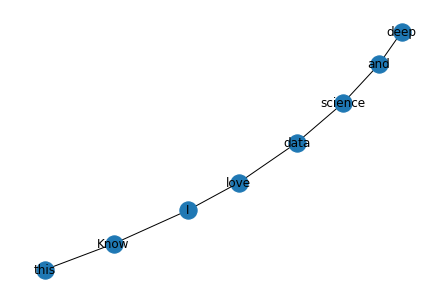

In [20]:
nx.draw(G, with_labels=True) 

#### 3) 동시 출현 확률 계산

* 어휘 동시 출현 빈도를 이용하면 어휘 동시 출현 확률까지 측정 가능하다.
* 어휘 동시 출현 확률 계산에는 `nltk`의 `ConditionalProbDist`를 이용한다.

##### ① cfd 객체 생성

In [21]:
from nltk.probability import ConditionalProbDist, MLEProbDist

cpd = ConditionalProbDist(cfd, MLEProbDist)
cpd.conditions()

['I', 'love', 'data', 'science', 'and', 'deep', 'Know', 'this']

##### ② 확률 매트릭스 형태로 출력

In [22]:
prob_matrix = []

for i in cpd.keys():
    prob_matrix.append([cpd[i].prob(j) for j in cpd.keys()])

prob_matrix = np.array(prob_matrix)

print(cpd.keys())
print(prob_matrix)

dict_keys(['I', 'love', 'data', 'science', 'and', 'deep', 'Know', 'this'])
[[0.         0.66666667 0.         0.         0.         0.
  0.33333333 0.        ]
 [0.         0.         0.5        0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


##### ③ 시인성을 높이기 위해 데이터프레임으로 변환

In [23]:
df = pd.DataFrame(prob_matrix, index=cpd.keys(), columns=cpd.keys())
df.style.background_gradient(cmap='coolwarm')

,I,love,data,science,and,deep,Know,this
I,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
love,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
data,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
science,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
deep,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Know,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
this,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* 확률 행렬도 인접 행렬로 간주할 수 있다.
* 그래프 시각화시 빈도 행렬과 동일한 결과를 얻을 수 있으나, 확률을 가중치로 사용시 부정확한 결과를 얻을 수 있다.

##### ④ 그래프 생성

In [24]:
prob_G = nx.from_pandas_adjacency(df)

print(prob_G.nodes())
print(prob_G.edges())

['I', 'love', 'data', 'science', 'and', 'deep', 'Know', 'this']
[('I', 'love'), ('I', 'Know'), ('love', 'data'), ('data', 'science'), ('science', 'and'), ('and', 'deep'), ('Know', 'this')]


- 가중치 계산

In [25]:
print(G.edges()[('I', 'love')])
print(G.edges()[('I', 'Know')])

print(prob_G.edges()[('I', 'love')])
print(prob_G.edges()[('I', 'Know')])

{'weight': 2}
{'weight': 1}
{'weight': 0.6666666666666666}
{'weight': 0.3333333333333333}


##### ⑤ 그래프로 시각화

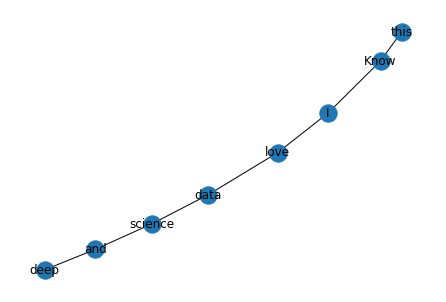

In [26]:
nx.draw(prob_G, with_labels=True)

### 3. 중심성(Centrality) 지수

* 연결망 분석에서 가장 많이 주목하는 속성은 바로 중심성 지수이다.
* 중심성은 전체 연결망에서 중심에 위치하는 정도를 표현하는 지표로, 이를 분석하면 연결 정도, 중요도 등을 알 수 있다.
* 중심성 지수는 나타내는 특징에 따라 연결 중심성, 매개 중심성, 근접 중심성, 위세 중심성으로 구분한다.

#### 1) 연결 중심성(Degree Centrality)

* 연결 중심성은 가장 기본적이고 직관적으로 중심섬을 측정하는 지표이다.
* 텍스트에서 다른 단어와의 동시 출현 빈도가 많은 특정 단어는 연결 중심성이 높다고 볼 수 있다.
* 연결 정도로만 측정하면 연결망의 크기에 따라 달라져 비교가 어렵기 때문에 여러 방법으로 표준화한다.
* 주로 (특정 노드 i와 직접적으로 연결된 노드 수 / 노드 i와 직간접적으로 연결된 노드 수)로 계산한다.

* 여기서 직접적으로 연결된 노드는 서로 엣지 관계인 노드를 뜻하며, 간접적으로 연결된 노드는 서로 엣지 관계는 아니나 다른 노드와 엣지에 의해 도달할 수 있는 노드를 말한다.

* 연결 중심성 계산 수식

$$ degree_{ik} = \sum_{i=1}^{N} Z_{ijk} = Z_{jk}$$
$$ outdegree_{ik} = \sum_{j=1}^{N} Z_{ijk} = Z_{ik} $$
$$ C_{i} = \sum_{j=1}^{n}(Z_{ij}+Z_{ji}) / \sum_{i=1}^{n}\sum_{j=1}^{n}(Z_{ij})\qquad단, 0\le C \le 1$$

* 해당 수식을 직접 계산할 수도 있으나, `networkx`에는 해당 라이브러리로 구성된 그래프의 연결 중심성을 쉽게 계산해주는 함수가 존한다.  

##### ① 연결 중심성 weight 계산

In [27]:
nx.degree_centrality(G)

{'I': 0.2857142857142857,
 'love': 0.2857142857142857,
 'data': 0.2857142857142857,
 'science': 0.2857142857142857,
 'and': 0.2857142857142857,
 'deep': 0.14285714285714285,
 'Know': 0.2857142857142857,
 'this': 0.14285714285714285}

##### ② 노드 사이즈 계산 함수 생성

In [28]:
def get_node_size(node_values):
    nsize = np.array([v for v in node_values])
    nsize = 1000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

    return nsize

##### ③ plt 스타일 설정

In [29]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

##### ④ 그래프 시각화

- 노드 사이 중요도와 랭킹 차이를 노드의 사이즈에 반영하여 시각화 한다.
- 중심성 값에 따라 각 노드 사이즈를 다르게 해야 한다.
- 사이즈를 나타내는 함수를 정의해서 노드 사이즈를 계산한다.

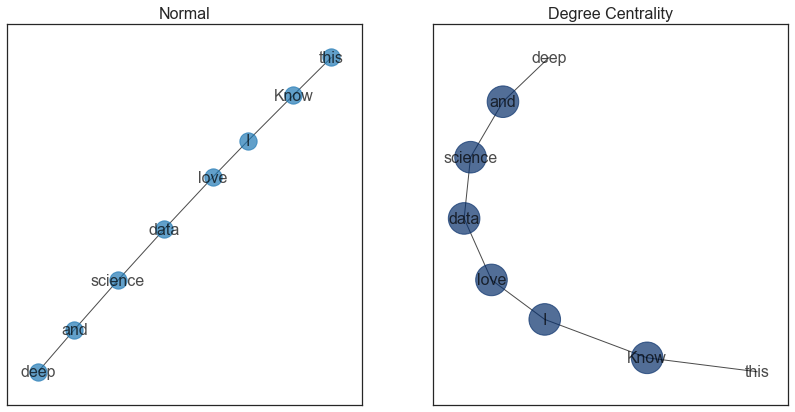

In [30]:
dc = nx.degree_centrality(G).values()

plt.figure(figsize=(14,7))
plt.axis('off')

plt.subplot(121) 
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(122)
plt.title('Degree Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(dc), node_size=get_node_size(dc), alpha=0.7, cmap=plt.cm.Blues)

#### 2) 위세 중심성(Eigenvector Centraility)

* 위세 중심성은 연결된 상대 단어의 중요성에 가중치를 둔다.
* 중요한 단어와 많이 연결됐다면 위세 중심성은 높아지게 된다.
* 위세 중심성은 고유 벡터로써 인접해 있는 노드의 위세 점수와 관련되어 있어 직접 계산하기는 쉽지 않다.

* 위세 중심성 계산 수식

$$ P_i =\sum_{j=1}^{N-1}P_iZ_{ji},\qquad0 \le P_i \le 1$$

* 위세 중심성 계산에는 `eigenvector_centraility`를 이용해 계산한다.
* `weight`로는 어휘 동시 출현 빈도를 이용한다.

##### ① 위세 중심성 weight 계산

In [31]:
nx.eigenvector_centrality(G, weight='weight')

{'I': 0.618741997484724,
 'love': 0.6223045175925663,
 'data': 0.3122260984183694,
 'science': 0.1552224883366372,
 'and': 0.07431709028004341,
 'deep': 0.02984384880487991,
 'Know': 0.29623033468397025,
 'this': 0.11895450435929002}

##### ② 그래프 시각화

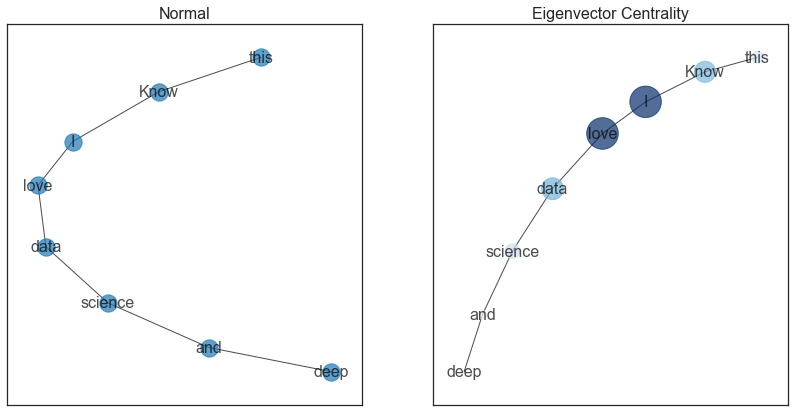

In [32]:
ec = nx.eigenvector_centrality(G, weight='weight').values()

plt.figure(figsize=(14,7))
plt.axis('off')

plt.subplot(121) 
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(122)
plt.title('Eigenvector Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(ec), node_size=get_node_size(ec), alpha=0.7, cmap=plt.cm.Blues)

#### 3) 근접 중심성(Closeness Centrality)

* 근접 중심성은 한 단어가 다른 단어에 얼마나 가깝게 있는지를 측정하는 지표이다.
* 직접적으로 연결된 노드만 측정하는 연결 중심성과는 다르게, 근접 중심성은 직간접적으로 연결된 모든 노드들 사이의 거리를 측정한다.
* 근접 중심성을 측정하기 위해선 다음과 같이 계산한다.
  (모든 노드 수 - 1 / 특정 노드 i에서 모든 노드에 이르는 최단 경로 수를 모두 더한 수)


$$ C_C(A) = \frac{1}{\frac{1}{N-1}\sum_{x \ne A}l_{X,A}} = \frac{N-1}{\sum_{x \ne A}l_{X,A}} $$

* 근접 중심성을 계산하기 위해선 `closeness_centrality()` 함수를 사용한다.

##### ① 근접 중심성 weight 계산

In [33]:
nx.closeness_centrality(G, distance='weight')

{'I': 0.30434782608695654,
 'love': 0.3684210526315789,
 'data': 0.3684210526315789,
 'science': 0.3333333333333333,
 'and': 0.28,
 'deep': 0.22580645161290322,
 'Know': 0.25925925925925924,
 'this': 0.21212121212121213}

##### ② 그래프 시각화

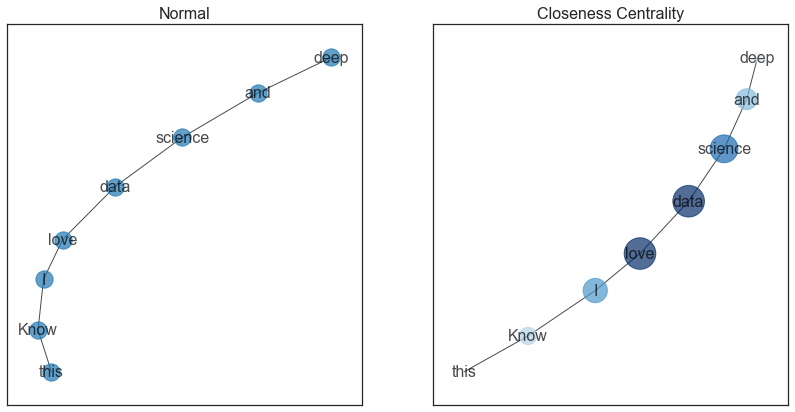

In [34]:
cc = nx.closeness_centrality(G, distance='weight').values()

plt.figure(figsize=(14,7))
plt.axis('off')

plt.subplot(121) 
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(122)
plt.title('Closeness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(cc), node_size=get_node_size(cc), alpha=0.7, cmap=plt.cm.Blues)

#### 4) 매개 중심성(Betweeness Centrality)

* 매개 중심성은 한 단어가 단어들과의 연결망을 구축하는데 얼마나 도움을 주는지 측정하는 지표이다.
* 매개 중심성이 높은 단어는 빈도 수가 작더라도 단어 간 의미부여 역할이 크기 때문에, 해당 단어를 제거하면 의사소통이 어려워진다.
* 매개 중심성은 모든 노드 간 최단 경로에서 특정 노드가 등장하는 횟수로 측정하며, 표준화를 위해 최댓값인 (N-1) x (N-2) / 2로 나눈다.

* 매개 중심성 계산 수식

$$ C_{B}^{'}(P_m) = \frac{\sum_i^N \sum_j^N \frac{g_{imj}}{g_{ij}}}{(\frac{N^2-3N+2}{2})}, \qquad 단, i<j,\quad i \ne j$$

* 매개 중심성을 계산하기 위해선 `current_flow_betweenness_centrality()` 함수를 이용한다.

##### ① 매개 중심성 weight 계산

In [35]:
nx.betweenness_centrality(G)

{'I': 0.47619047619047616,
 'love': 0.5714285714285714,
 'data': 0.5714285714285714,
 'science': 0.47619047619047616,
 'and': 0.2857142857142857,
 'deep': 0.0,
 'Know': 0.2857142857142857,
 'this': 0.0}

##### ② 그래프 시각화

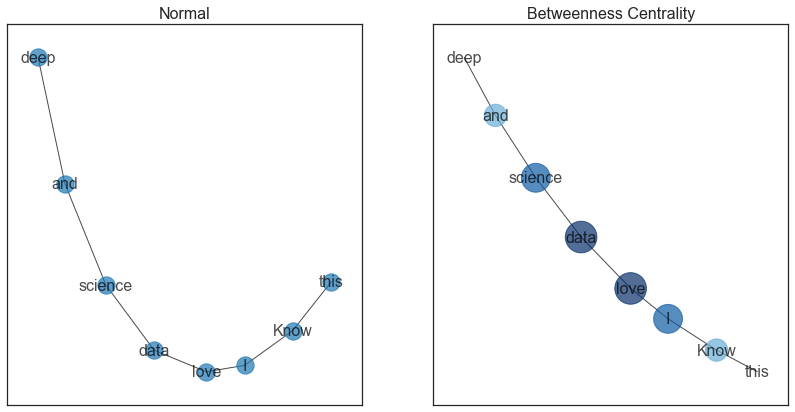

In [36]:
bc = nx.betweenness_centrality(G).values()

plt.figure(figsize=(14,7))
plt.axis('off')

plt.subplot(121) 
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(122)
plt.title('Betweenness Centrality', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(bc), node_size=get_node_size(bc), alpha=0.7, cmap=plt.cm.Blues)

#### 5) 페이지랭크(PageRank)

* 월드 와이드 웹과 같은 하이퍼링크 구조를 가지는 문서에 상대적 중요도에 따라 가중치를 부여하는 방법이다.
* 이 알고리즘은 서로간에 인용과 참조로 연결된 임의의 묶음에 적용 가능하다.
* 페이지 랭크는 더 중요한 페이지는 더 많은 다른 사이트로부터 링크를 받는다는 관찰에 기초한다.

##### ① 페이지랭크 중심성 weight 계산

In [37]:
nx.pagerank(G)

{'I': 0.16604487665923956,
 'love': 0.1639643180731959,
 'data': 0.12028637724338961,
 'science': 0.1295990134668058,
 'and': 0.1405365755123698,
 'deep': 0.07847742827203451,
 'Know': 0.12795924018796379,
 'this': 0.07313217058500093}

##### ② 그래프 시각화

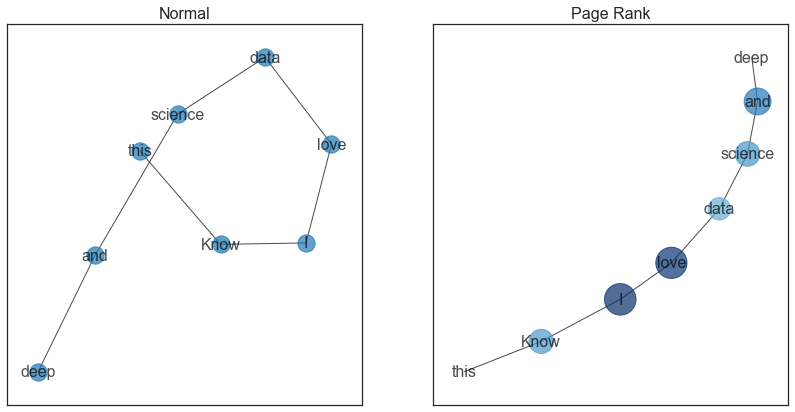

In [38]:
pr = nx.pagerank(G).values()

plt.figure(figsize=(14,7))
plt.axis('off')

plt.subplot(121) 
plt.title('Normal', fontsize=16)
nx.draw_networkx(G, font_size=16, alpha=0.7, cmap=plt.cm.Blues)

plt.subplot(122)
plt.title('Page Rank', fontsize=16)
nx.draw_networkx(G, font_size=16, node_color=list(pr), node_size=get_node_size(pr), alpha=0.7, cmap=plt.cm.Blues)